## Import the Packages 

In [1]:
import numpy as np # for numerical analyis
import pandas as pd # data analysis
import matplotlib.pyplot as plt # drawing plots
import seaborn as sns   # visualize 
import plotly # visualize 
import plotly.graph_objects as go # advance visualize 
import plotly.express as px # visualize 
plotly.offline.init_notebook_mode(connected=True) # connected = True means it will download the latest version of plotly javascript library.

import warnings
warnings.filterwarnings('ignore') # ignore warning comes during runs 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading the data

In [2]:
# reading the data 
df=pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")
df.sample(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7114,CB SMART LIFE,TOOLS,NaN,30,9.0M,500+,Free,0,Everyone,Tools,"July 3, 2018",2.4.0,4.1 and up
4363,Don't Hug Me I'm So Scared,GAME,3.5,901,63M,"50,000+",Free,0,Everyone,Adventure,"June 8, 2018",1.8.5,2.3 and up
7189,Diligan CD VR,MEDICAL,NaN,1,46M,50+,Free,0,Everyone,Medical,"May 21, 2018",1.0,4.4 and up
6647,Gold Wallpapers,PERSONALIZATION,4.5,43,28M,"10,000+",Free,0,Everyone,Personalization,"March 26, 2018",1.1,4.0 and up
3522,Microsoft Word,PRODUCTIVITY,4.5,2084125,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"July 11, 2018",16.0.10325.20043,4.4 and up
7167,CD - Teach me ABC English L1,FAMILY,NaN,2,63M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.0 and up
6116,BF Abstract 3d Pictures,FAMILY,4.2,72,2.5M,"10,000+",Free,0,Teen,Entertainment,"June 18, 2015",5.1,3.0 and up
8187,Metal Soldiers 2,GAME,4.4,153649,Varies with device,"10,000,000+",Free,0,Teen,Action,"June 18, 2018",1.11.2,4.1 and up


## Understanding the data

In [3]:
df.shape
# 10841 rows and 13 columns 

(10841, 13)

In [4]:
df.info()
# all columns are in object(categorical) format except Rating column 
# need to change the dtypes of some columns 
# Rating column have less values except others.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()
# checking duplicates values 
# 483 values are present 

483

In [6]:
df.nunique()
# how many unique values are there 

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

## Data cleaning 

In [7]:
df.dropna(inplace=True)
# droping all duplicates values 

In [8]:
# cleaning Installs column 
# remove + and comma(,) from the values 

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x) # removing +
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x) # removing ,
df['Installs'] = df['Installs'].apply(lambda x: int(x)) # converting into int 


In [9]:
# cleaing Price column 
# removing $ sign 

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x)) # converting into float 


In [10]:
# cleaing Size column

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

# EDA

#### which App cateogry is the highest ?

- Family , Game and Tools

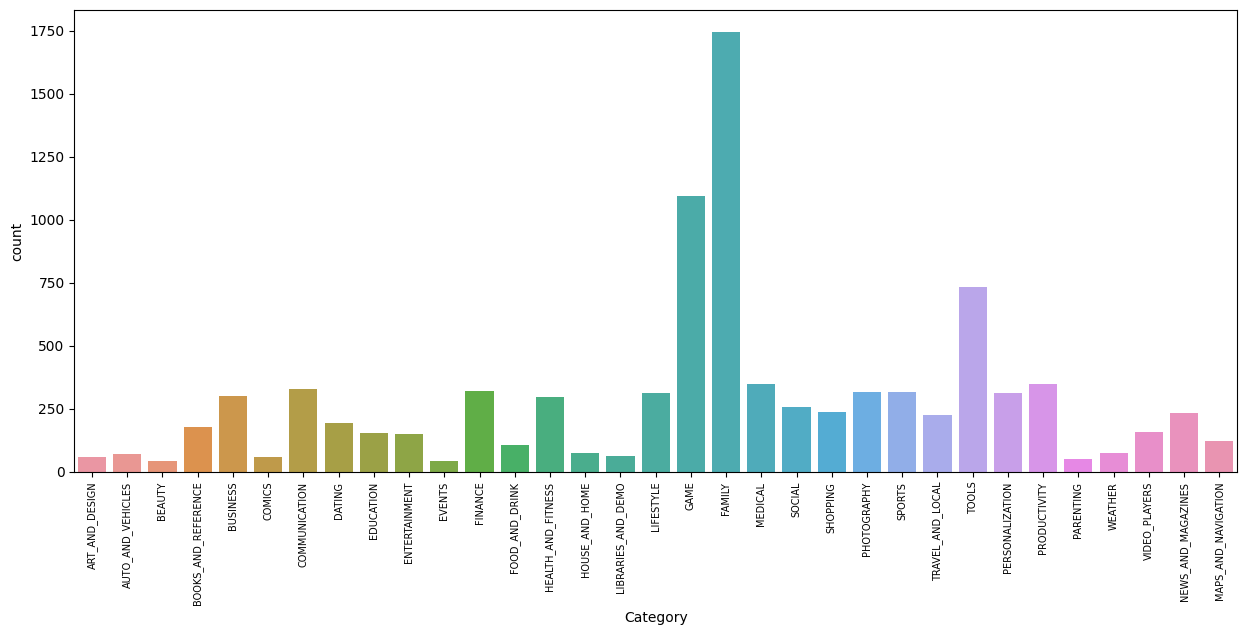

In [11]:
plt.figure(figsize=(15,6))
fig=sns.countplot(x=df["Category"])
fig.set_xticklabels(fig.get_xticklabels(), rotation =90,fontsize=7)
plt.show()

In [12]:
#df.loc[df.Category == 'FAMILY']['Installs']

### Rating score

In [13]:
avg=np.mean(df["Rating"])
print("Average rating of apps",round(avg,2))

Average rating of apps 4.19


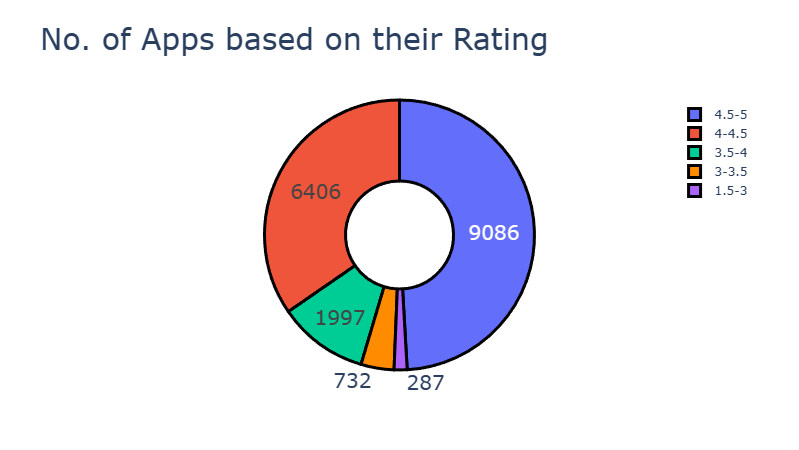

In [14]:
# analysis based on rating
labels=["1.5-3","3-3.5","3.5-4","4-4.5","4.5-5"]
values=[
       (df["Rating"]<3).sum(),
       (df["Rating"]<3.5).sum(),
       (df["Rating"]<4).sum(),
       (df["Rating"]<4.5).sum(),
       (df["Rating"]<5).sum()]
colors=["mediumlateblue","darkorange"]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=0.4)])
fig.update_traces(hoverinfo="label+percent+value",textinfo="value",textfont_size=20,
                 marker=dict(colors=colors,line=dict(color="black",width=3)))
fig.update_layout(title="No. of Apps based on their Rating",titlefont={"size":30})
fig.show()

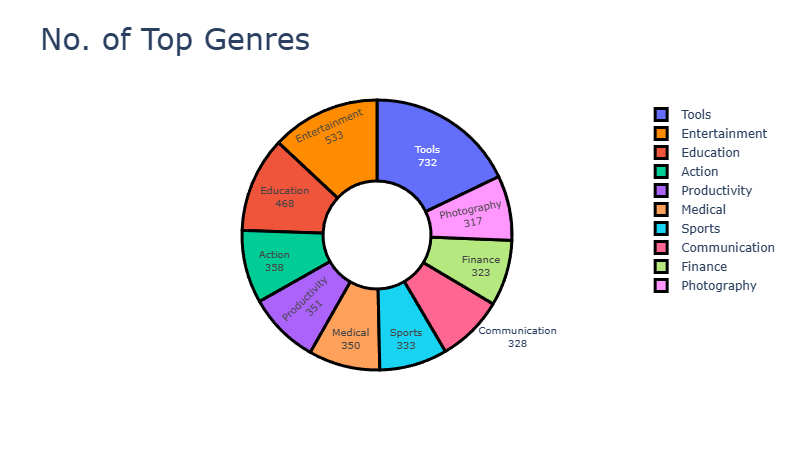

In [15]:
labels=df["Genres"].value_counts()[:10].index
values=df["Genres"].value_counts()[:10]
colors=["mediumlateblue","darkorange"]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=0.4)])
fig.update_traces(hoverinfo="label+percent+text+value",textinfo="value+label",textfont_size=10,
                 marker=dict(colors=colors,line=dict(color="black",width=3)))
fig.update_layout(title="No. of Top Genres",titlefont={"size":30})
fig.show()

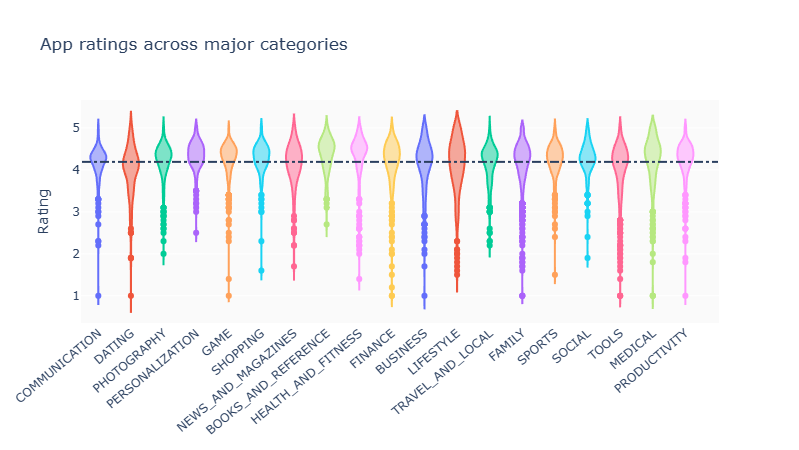

In [16]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.Category)))]

layout = {'title' : 'App ratings across major categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.Rating)),
              'x1': 19,
              'y1': np.nanmean(list(groups.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': df.loc[df.Category==category]['Rating'], 
    'type':'violin',
    'name' : category,
    'showlegend':False
    } for i,category in enumerate(list(set(groups.Category)))]



plotly.offline.iplot({'data': data, 'layout': layout})



<AxesSubplot: xlabel='Type', ylabel='count'>

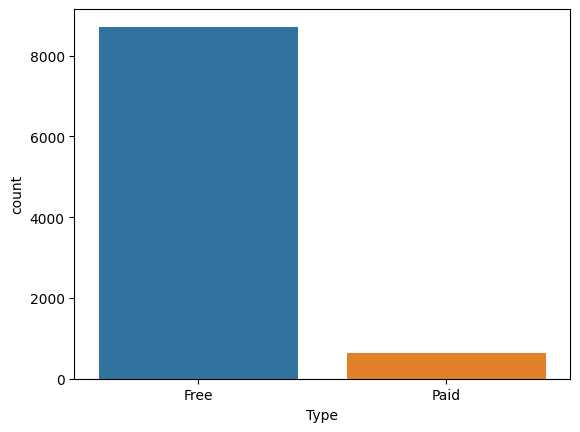

In [17]:
sns.countplot(x=df["Type"])

<AxesSubplot: xlabel='Type', ylabel='count'>

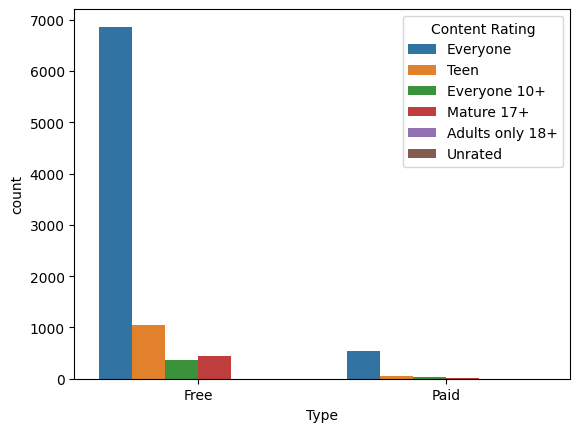

In [18]:
sns.countplot(x=df["Type"],hue=df["Content Rating"])

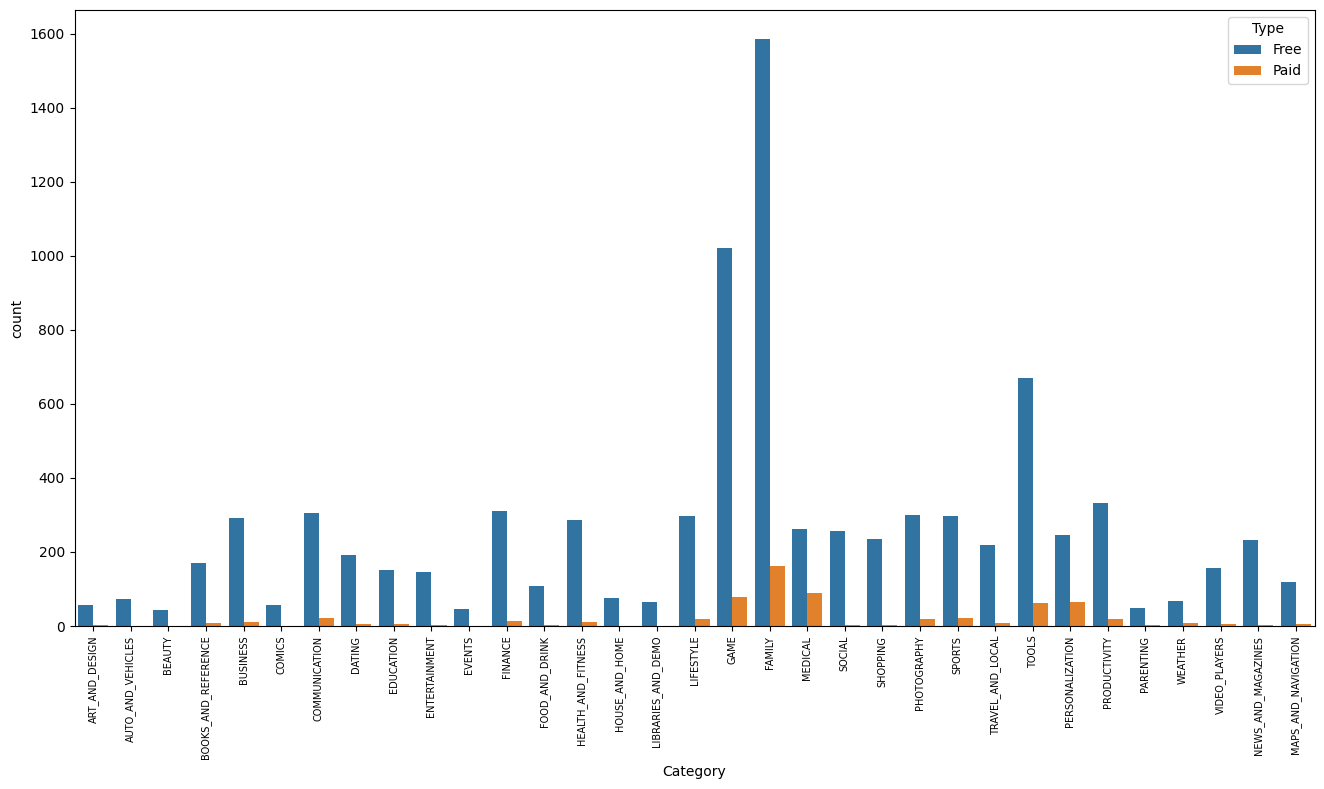

In [19]:
plt.figure(figsize=(16,8))
fig=sns.countplot(x=df["Category"],hue=df["Type"])
fig.set_xticklabels(fig.get_xticklabels(), rotation =90,fontsize=7)
plt.show()

In [20]:
ddf=pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv")
ddf

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [21]:
ddf.info()
# around 40% data is empty 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [22]:
ddf.nunique()
# checking uniques values 

App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         5410
Sentiment_Subjectivity     4474
dtype: int64

In [23]:
ddf.isnull().sum()
# check how many null values are there 

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [24]:
ddf.duplicated().sum()
# checking how many suplicates value are there 

33616

In [25]:
ddf.drop_duplicates(inplace=True)
# droping duplicates value 

In [26]:
ddf.shape
# after droping duplicates value shape of our  data frame 

(30679, 5)

In [27]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [28]:
ddf.isnull().sum()
# checking null values after dropping duplicates value 

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [29]:
ddf.dropna(inplace=True)
# droping null values 

In [30]:
ddf.info()
# now data is cleaned 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


<AxesSubplot: xlabel='Sentiment', ylabel='count'>

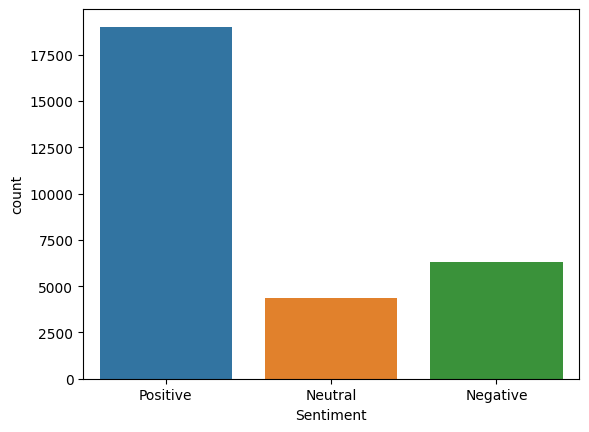

In [31]:
sns.countplot(x=ddf["Sentiment"])

<AxesSubplot: xlabel='Sentiment_Subjectivity', ylabel='Sentiment_Polarity'>

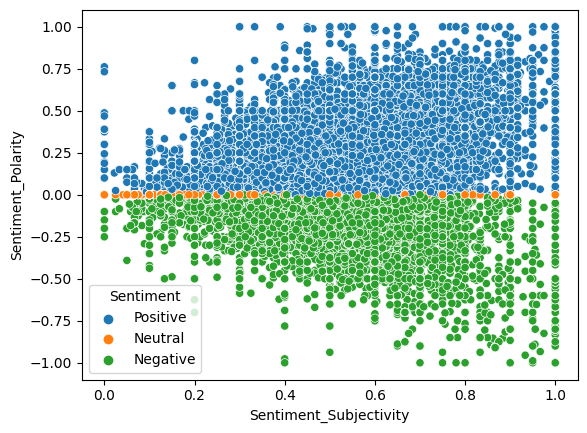

In [32]:
sns.scatterplot(x=ddf["Sentiment_Subjectivity"],y=ddf["Sentiment_Polarity"],hue=ddf["Sentiment"])

In [33]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=300, colormap="Set2")
# generate word cloud

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
words=ddf["Translated_Review"].apply(lambda x: " ".join(x for x in str(x).split(' ') if x not in stop))

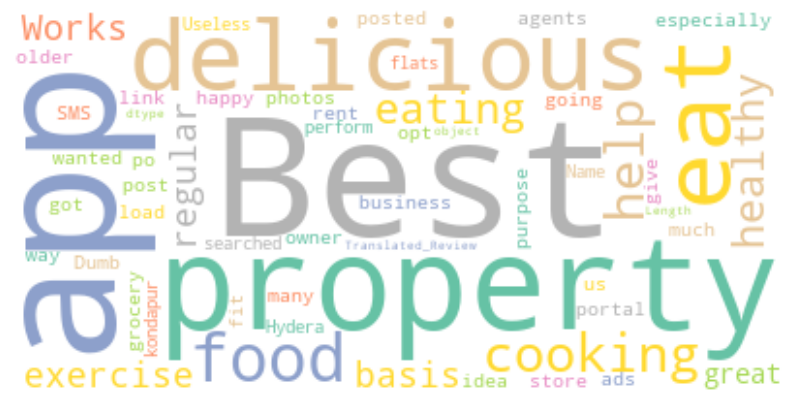

In [35]:
wc.generate(''.join(str(words)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Merging both data frames 

In [36]:
df_new=pd.merge(df,ddf,on="App",how="inner") # app column is common in both the tables 
df_new

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
46687,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
46688,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
46689,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


<AxesSubplot: xlabel='Sentiment_Subjectivity', ylabel='Sentiment_Polarity'>

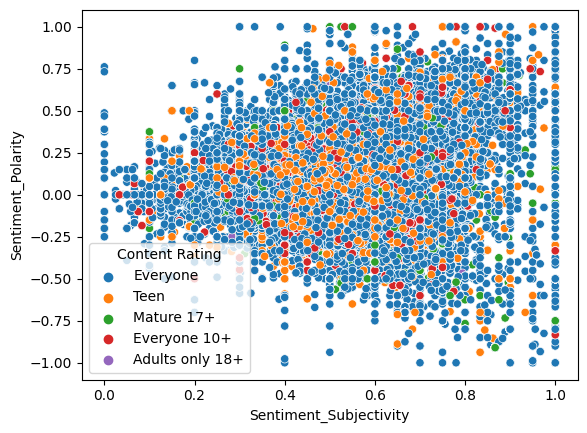

In [37]:
sns.scatterplot(x=df_new["Sentiment_Subjectivity"],y=df_new["Sentiment_Polarity"],hue=df_new["Content Rating"])

<AxesSubplot: xlabel='Type', ylabel='count'>

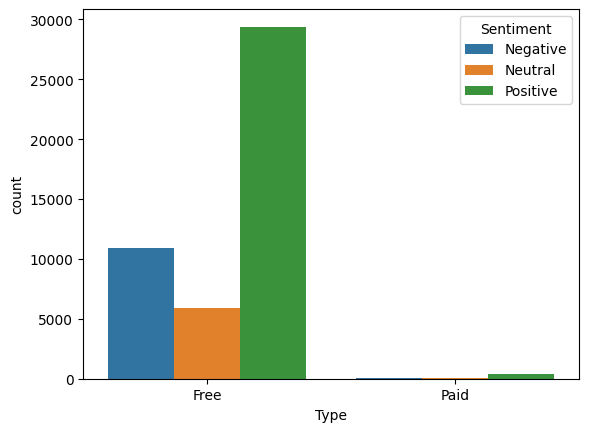

In [38]:
sns.countplot(hue=df_new["Sentiment"],x=df_new["Type"])

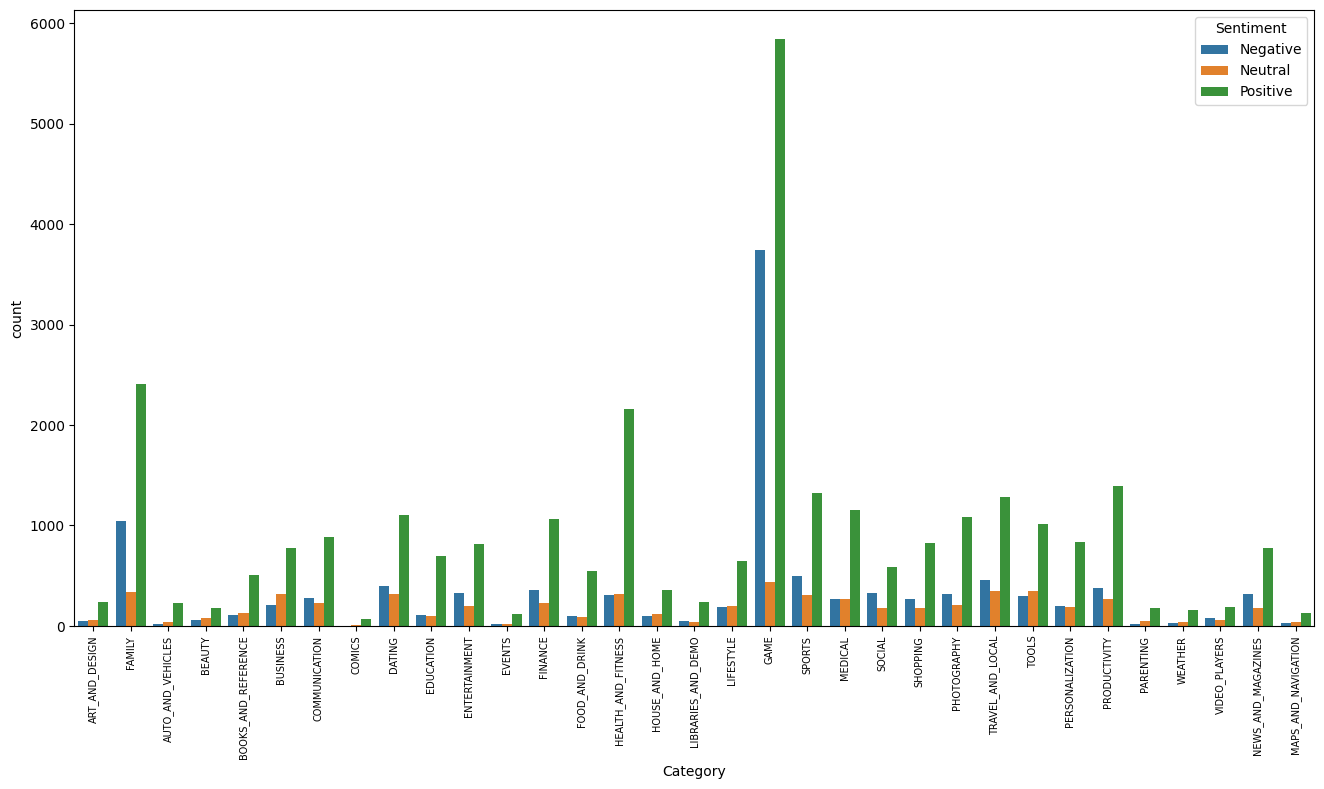

In [39]:
plt.figure(figsize=(16,8))
fig=sns.countplot(hue=df_new["Sentiment"],x=df_new["Category"])
fig.set_xticklabels(fig.get_xticklabels(), rotation =90,fontsize=7)
plt.show()

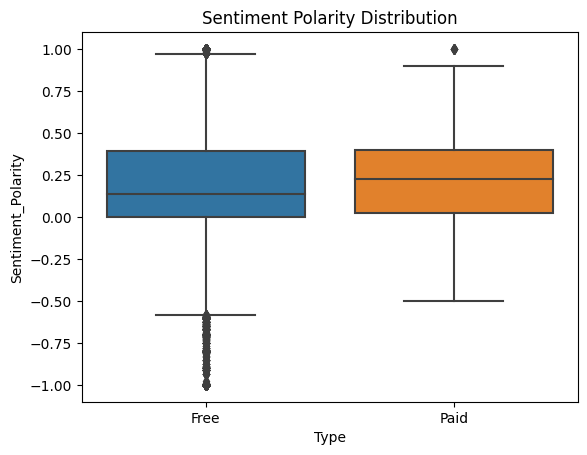

In [40]:
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=df_new)
title = ax.set_title('Sentiment Polarity Distribution')

# free apps got negative outliers means user give harsh comments on free apps 
# but in paid apps user don't give harsh comments 